# Exercise 2

## KNN Classifier

In this exercise we implement the KNN for classification of the Iris dataset.

First, understand the dataset and its contents by finding the keys and reading the description of the dataset. 

In [2]:
from sklearn.datasets import load_iris
iris_dataset=load_iris() #creates an object that contains the iris dataset
print('Keys of the iris_dataset is:', iris_dataset.keys())

Keys of the iris_dataset is: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
print(type(iris_dataset.data))

print(iris_dataset.data.shape)

print(iris_dataset.DESCR)


<class 'numpy.ndarray'>
(150, 4)
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :

#### A) To better understand the stucture of the dataset, answer the following
1. Find type and shape of ‘data’ in the Iris_dataset
2. Print the first five rows of ‘data’ 
3. Print the feature_names
4. Print the target_names
5. print type and shape of 'target'
6. Print first 10 values of the target, then print the unique values using np.unique(iris_dataset['target'])

In [5]:
import numpy as np

print('the type of the data in the Iris dataset is:',type(iris_dataset.data))


print('the type of the data in the Iris dataset is:', iris_dataset['data'].shape)

#printing first five rows of data
print('Printing the first five elements of data', iris_dataset['data'][:5])

print('Feature names:',iris_dataset.feature_names)

print('Target names:', iris_dataset.target_names)

print('Printing the first 10 elements of target', iris_dataset.target[:10],'\n') # printing the first 10 target vaues

print(np.unique(iris_dataset['target'])) # printing the different values in target 

the type of the data in the Iris dataset is: <class 'numpy.ndarray'>
the type of the data in the Iris dataset is: (150, 4)
Printing the first five elements of data [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Printing the first 10 elements of target [0 0 0 0 0 0 0 0 0 0] 

[0 1 2]


#### B) Classify the Iris species with KNN approach using the first two feature only (X_train[:, : 2], X_test[:, : 2]), and check the accuracy as K changes. Let K takes the values [1, 5, 10, 15]. No need to scale features.
In the code, use random_state=100 in train_test_split as below.

Plot the accuracy versus K and comment on your result

[0.73684210526315785, 0.84210526315789469, 0.84210526315789469, 0.76315789473684215]


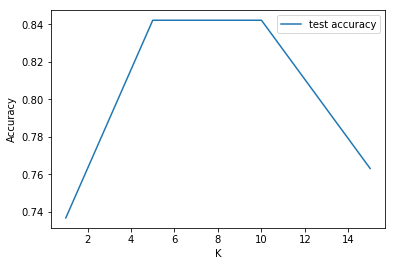

In [4]:
#Follow the code below then write your own code to answer the question
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


test_accuracy=[] # you can use the .append to test_accuracy to store the result
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=100)

#complete your code here
neighbor_setting =[1,5,10,15]


for N_neighbor in neighbor_setting:
    knn=KNeighborsClassifier(n_neighbors=N_neighbor) 
    knn.fit(X_train[:, :2], Y_train)
    test_accuracy.append(knn.score(X_test[:, :2],Y_test))
plt.plot(neighbor_setting,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.legend()
print (test_accuracy)

#### Comment: With two features only, performance is higher when K=5 or 10. The performance is low when K=1 (potentially overfitting) and as K increases the performace degrades (starts to underfit)

#### C) Use the Iris example, and find the accuracy of the KNN approach with K=5 when different number of features is used without scaling. 

- Hint: Here we just take features by the order they appear in the dataset. No feature selection. To use N_features only from training data use: X_train[:, : N_features ]

print then plot the accuracy verus the number of feature (i.e. when using one, two, three, and the four features)



[0.78947368421052633, 0.84210526315789469, 0.92105263157894735, 0.97368421052631582]


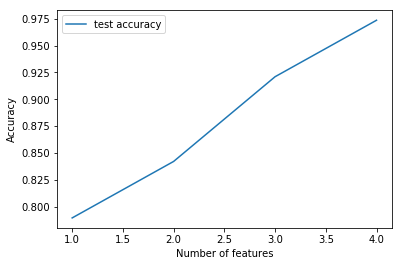

In [6]:
# You can write you code here

test_accuracy2=[]
N_neighbor=5
Num_features= range(1,5) #range of values from [1,2,3,4] #

knn=KNeighborsClassifier(n_neighbors=N_neighbor) 

for N_features in Num_features:
    knn.fit(X_train[:, :N_features], Y_train)
    test_accuracy2.append(knn.score(X_test[:, :N_features],Y_test))
    
plt.plot(Num_features,test_accuracy2,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.legend()
print(test_accuracy2)

#### D) Repeat C when feature scaling with MinMaxScaler is used. Comment on your result (comparing D and C)

1
0.79
2
0.84
3
0.97
4
0.97
[0.78947368421052633, 0.84210526315789469, 0.97368421052631582, 0.97368421052631582]


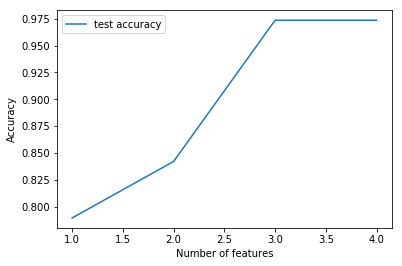

In [7]:
# Solution to part C) 
test_accuracy3=[]
N_neighbor=5
Num_features= range(1,5) #[1,2,3,4] #

scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=N_neighbor) 

for N_features in Num_features:
    print(N_features)
    knn.fit(X_train_transformed[:, :N_features], Y_train)
    test_accuracy3.append(knn.score(X_test_transformed[:, :N_features],Y_test))
    print("{:.2f}".format(knn.score(X_test_transformed[:, :N_features],Y_test)))
plt.plot(Num_features,test_accuracy3,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.legend()
print(test_accuracy3)

Comment: Scaling has not made a significant impact on this particular dataset. A possible reason is that features are almost on the same scale, hence feature scaling has not made a significant change. The only difference is when the number of features is 3. 